In [62]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("data/AviationData.csv", encoding='latin1', low_memory=False)
#encoding='latin1' to understand older special characters
#low_memory=False load files slowly due to mixed data types

In [64]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [66]:
# Check missing values per column
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [67]:
# List of columns to drop due to too much missing data
columns_to_drop = ['Latitude', 'Longitude',
    'Airport.Code', 'Airport.Name',
    'Aircraft.Category', 'FAR.Description',
    'Schedule', 'Air.carrier']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Check the new shape
df.shape

(88889, 23)

In [68]:
# Fill missing injury numbers with 0
injury_columns = ['Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured']

df[injury_columns] = df[injury_columns].fillna(0)

# Double check if still any missing
df[injury_columns].isnull().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [69]:
# Accident vs Incident breakdown
df['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

Dataset mainly captures serious aviation events (accidents with injuries, damage, or fatalities).

Incidents are relatively minor events (e.g., hard landings, runway veering without injuries).

The dataset contains a total of 88,889 records, of which 85,015 (approximately 96%) are classified as Accidents, and 3,874 (approximately 4%) are classified as Incidents






### What are the most dangerous phases of flight?
This will show which parts of the flight (takeoff, landing, cruise, etc.) are most risky!

In [70]:
# Check during which phases of flight accidents/incidents happen most
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

#### Quick Insights:
Landing is the most dangerous phase (highest number of accidents and incidents).

Takeoff and Cruise are also very risky.

Maneuvering (when pilots are manually controlling) also shows a significant number of events.

Standing (aircraft on the ground but not moving) and Taxi have fewer but non-zero events.

Go-around is a critical and dangerous phase too!

In [71]:
# Find most common aircraft models
df['Model'].value_counts().head(10)

Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64

### This tells us:

Which models are most popular in accident data.

Later: we can combine this with accident rates to find low-risk ones.

The most frequently involved aircraft models in aviation events were the Cessna 152 (2,367 occurrences), Cessna 172 series (various models), and the Piper PA-28-140. These aircraft are widely used for training and personal aviation, which likely explains their high occurrence rates
High numbers for certain aircraft models likely reflect their popularity and high flight hours rather than poor safety performance

### We want to find out:
→ Which aircraft models have the highest vs lowest total fatalities?

In [72]:
# Group by Model and sum total fatalities
fatalities_by_model = df.groupby('Model')['Total.Fatal.Injuries'].sum()

# Sort models by total fatalities in descending order
fatalities_by_model = fatalities_by_model.sort_values(ascending=False)

# Show top 10 models with highest fatalities
fatalities_by_model.head(10)

Model
737          1348.0
737-200       906.0
777 - 206     534.0
A320          513.0
MD-82         439.0
172N          430.0
172           400.0
DC-9-32       396.0
152           392.0
A321          381.0
Name: Total.Fatal.Injuries, dtype: float64

High fatalities could mean many accidents or one very bad accident.

Let us find models that have:

Many aircraft flying (popular but reliable),
Low fatalities relative to their usage.

To balance popularity vs safety, a good idea is to calculate:

Fatality Rate = Total Fatalities / Total Accidents
This will help us normalize the risk

In [73]:
# Total accidents per model
accidents_by_model = df['Model'].value_counts()

# Total fatalities per model
fatalities_by_model = df.groupby('Model')['Total.Fatal.Injuries'].sum()

# Create a DataFrame
risk_df = pd.DataFrame({'Total_Accidents': accidents_by_model,
    'Total_Fatalities': fatalities_by_model})

# Calculate Fatality Rate
risk_df['Fatality_Rate'] = risk_df['Total_Fatalities'] / risk_df['Total_Accidents']

# Sort by Fatality Rate descending
risk_df = risk_df.sort_values('Fatality_Rate', ascending=False)

# Show the top 10 highest fatality rate models
risk_df.head(10)

,Total_Accidents,Total_Fatalities,Fatality_Rate
Model,,,
747-168,1,349.0,349.0
TU-154,1,349.0,349.0
767-366-ER,1,217.0,217.0
777 - 206,3,534.0,178.0
A 310,1,169.0,169.0
A320 - 216,1,162.0,162.0
E135 Legacy,1,154.0,154.0
A310-300,1,124.0,124.0
-737-222,1,123.0,123.0


What This Tells Us:
All these aircraft had only 1 or very few accidents, but when they crashed, many people died — very deadly per crash.

Planes like 747-168 and TU-154 had huge fatality numbers (likely big commercial crashes).

Even small jets like the CitationJet 2 had high fatalities for one crash.



### Let’s plot a bar chart showing the Fatality Rate for the top 10 aircraft models

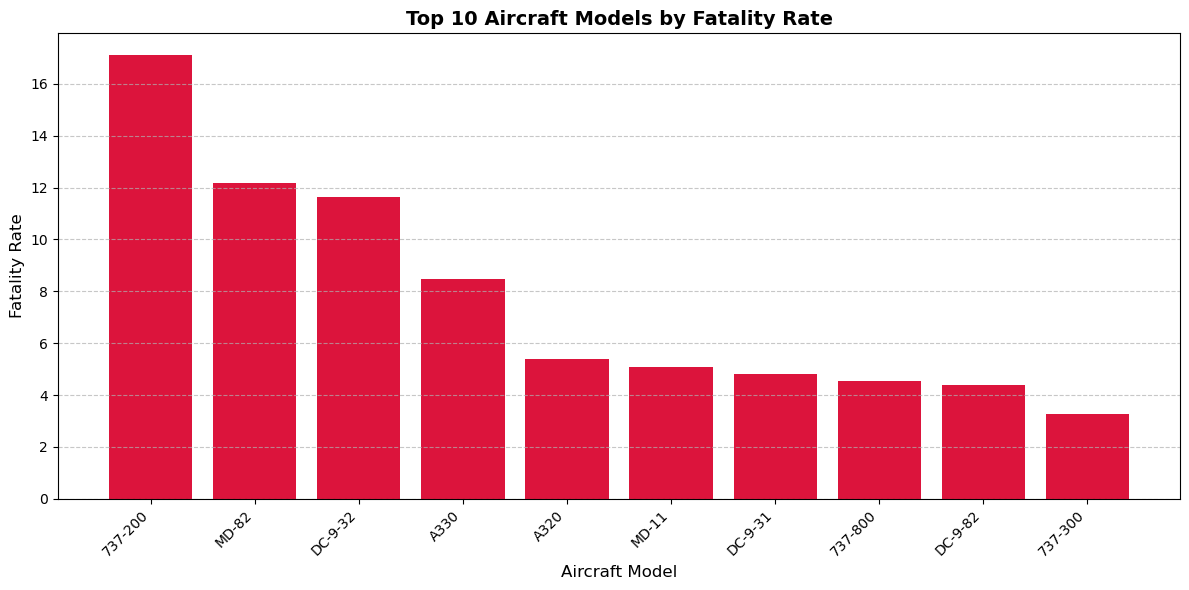

In [74]:
import matplotlib.pyplot as plt

# 1. Group the data by Model and calculate total accidents and fatalities
model_summary = df.groupby('Model').agg(
    Total_Accidents=('Model', 'count'),
    Total_Fatalities=('Total.Fatal.Injuries', 'sum')
).reset_index()

# 2. Calculate fatality rate
model_summary['Fatality_Rate'] = model_summary['Total_Fatalities'] / model_summary['Total_Accidents']

# 3. Filter models with a reasonable number of accidents (e.g., more than 30 accidents)
filtered_models = model_summary[model_summary['Total_Accidents'] > 30]

# 4. Sort by Fatality Rate (descending to find the most fatal) and select top 10
top_10_fatal = filtered_models.sort_values('Fatality_Rate', ascending=False).head(10)

# 5. Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_fatal['Model'], top_10_fatal['Fatality_Rate'], color='crimson')
plt.ylabel('Fatality Rate', fontsize=12)
plt.xlabel('Aircraft Model', fontsize=12)
plt.title('Top 10 Aircraft Models by Fatality Rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Let’s plot a bar chart showing the top 10 safest models (lowest fatality rate among popular aircraft)
Since the goal of the project is to recommend safer aircraft for the company to invest in, low fatality rate models are even more important.

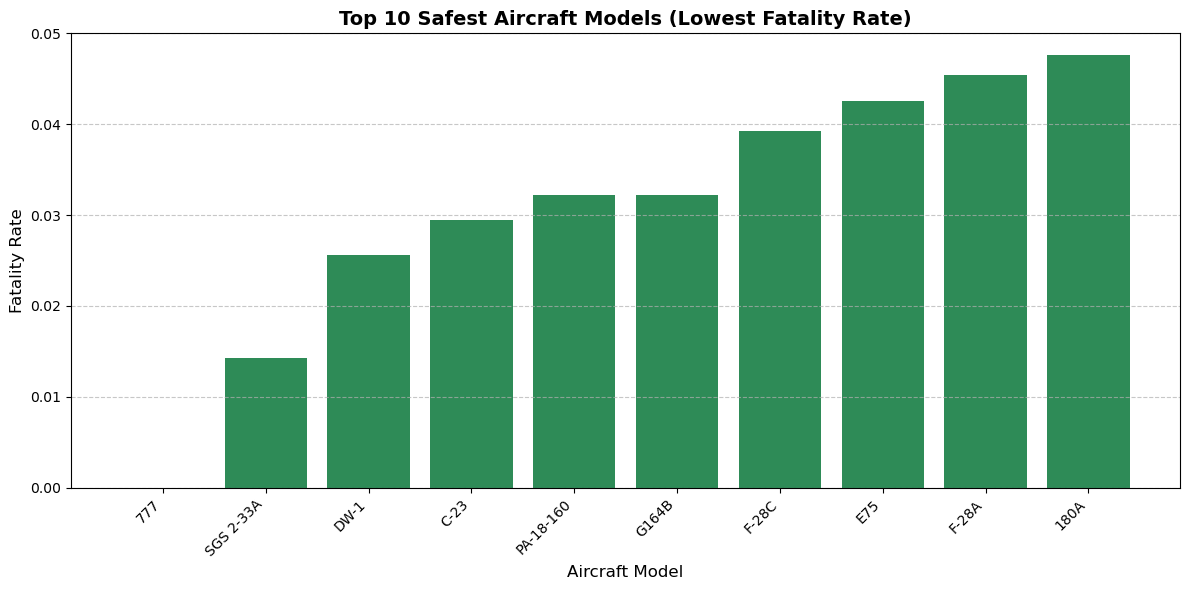

In [75]:
import matplotlib.pyplot as plt

# 1. Build a true summary by model:
model_summary = df.groupby('Model').agg(Total_Accidents=('Event.Id', 'count'),
    Total_Fatalities=('Total.Fatal.Injuries', 'sum'))

# 2. Compute fatality rate
model_summary['Fatality_Rate'] = (model_summary['Total_Fatalities'] / model_summary['Total_Accidents'])

# 3. Filter to models with a robust sample size (e.g. > 30 accidents)
robust = model_summary[model_summary['Total_Accidents'] > 30]

# 4. Select the 10 models with the lowest fatality rate
safe_models = robust.sort_values('Fatality_Rate', ascending=True).head(10)

# 5. Plot vertical bars from safest to less safe
plt.figure(figsize=(12, 6))
plt.bar(safe_models.index, safe_models['Fatality_Rate'], color='seagreen')
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Safest Aircraft Models (Lowest Fatality Rate)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()